#### Intro to Quantum Programming - Spring 2021
## Homework 4: Due 03/29/2021

For each exercise below, add as many cells as you want. To evaluate your submission, I will do **Restart and Run All**. . For help with Markdown, see [this link](https://www.markdownguide.org/).

In [1]:
# Here's a cell for import statements... add more if necessary (or just import below as needed)
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, AncillaRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library.standard_gates import XGate, CZGate, CXGate, SGate, CPhaseGate, PhaseGate
from qiskit.circuit.library import GroverOperator, QFT, PhaseEstimation, CXGate, RXXGate, TGate
import numpy as np

For this assignment you can use the [PhaseEstimation](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseEstimation.html) and [QFT](https://qiskit.org/documentation/stubs/qiskit.circuit.library.QFT.html) circuits provided by the Qiskit Circuit Library. You can also use other logic circuits provided by the [library](https://qiskit.org/documentation/apidoc/circuit_library.html).

----
#### Exercise 4.1

Use *Phase Estimation* to confirm that $|-1\rangle$ is an eigenstate of the CNOT gate with an eigenphase of $\pi$. To clarify, qubit 0 is $|1\rangle$ and is the control; qubit 1 is $|-\rangle$ and is the target. (Use the [CXGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html) class in the circuit library as the unitary.)  Use at least three qubits to represent the eigenphase.

In [4]:
# Sets the initial state to |-1>

def initialize(qc):
    # make qubit 0 of eigenstate |1>
    qc.x(3)

    # make qubit 1 of eigenstate |->
    qc.x(4)
    qc.h(4)
    
    qc.barrier()


In [5]:
# Return circuit used for the unitary of c not
def unitary():
    unitary = QuantumRegister(2, 'unitary')
    unitaryToTest = QuantumCircuit(unitary)
    unitaryToTest.cx(0,1)
    return unitaryToTest

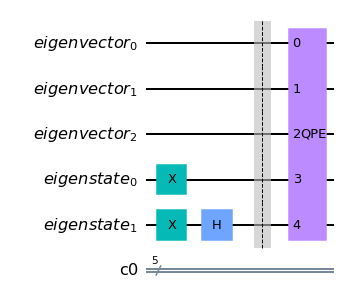

In [6]:
# Initalize the circuit to |-1>

ev = QuantumRegister(3, 'eigenvector')
es = QuantumRegister(2, 'eigenstate')
c = ClassicalRegister(5)
qc = QuantumCircuit(ev,es,c)

initialize(qc)

# Set up unitary 
unitaryToTest = unitary()

# append the phaseEstimation 
qc.append(PhaseEstimation(num_evaluation_qubits=3, unitary=unitaryToTest), ev[:]+es[:])

# Draw the circuit to be used
qc.draw('mpl')


We can prove that the eigenstate |-1> works because the output of the eigenstate should still be |-1> after the phase estimation circuit is applied. Therefore, we can prove this by applying the initialization in reverse order.

We can then prove that the eigenvector is 𝜋 by examining the output for the eigenvector. The output of the phase estimation circuit can be calculated by the equation : 

    𝑅 = 𝜃 / (2𝜋) ⋅ 2^m

where m is the number of bits used (in this case, 3). After plugging in 𝜋 into the formula for 𝜃, and 3 in for m, we get the answer:

    R = 4

After converting this into binary (and switching the bit order for qiskit), we get that the target output for the Eigenstate should be:
    
    eigenstate = 001

In [7]:
# Reverse the initialization
def reverseInit(qc):
    qc.barrier()
    qc.h(4)
    qc.x(4)
    qc.x(3)
    qc.barrier()

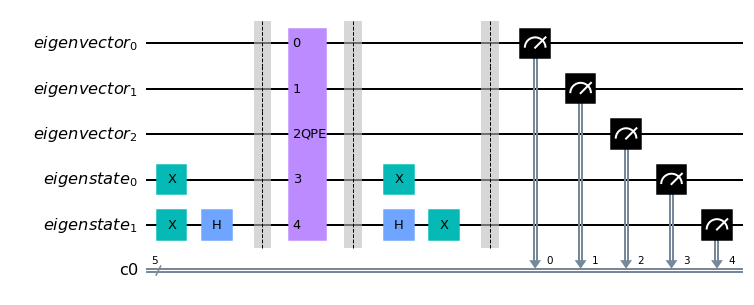

In [8]:
# Reverse the initialization
reverseInit(qc)

for i in range(5):
    qc.measure(i,i)
sim = Aer.get_backend('qasm_simulator')
counts = execute(qc, sim).result().get_counts()
qc.draw('mpl')


In [9]:
# Compares the Eigenstate to the expected Eigenstate
def checkEigenstate(expected, actual):
    if (expected == actual[0:2]):
        print("Eigenstate is correct")
    else:
        print("Eigenstate is not correct")

In [10]:
# Reverses the order of the bits to make it easier to convert into int
# numQubits is the amount of qubits to ignore
def reverseOrderOfBits(actual, numQubits):
    rightOrder = ""
    for i in reversed(range(2, numQubits + 3)):
        rightOrder += actual[i]
    return rightOrder 

In [11]:
def outputEigenvector(actual, numQubits):
    correctOrder = reverseOrderOfBits(actual, numQubits - 1)
    r = int(correctOrder,2)
    theta = r / (2**numQubits) * 2
    print("Eigenvector is: " + str(theta) + "*𝜋")


In [12]:
# Expected outcome: 001 for eigenvector, 00 for eigenstate (Read above for explanation)
# Together : 00001 
print("Expected:")
print("Eigenstate is correct")
print("Eigenvector is: 1.0*𝜋\n")

print("Actual:")
checkEigenstate("00", counts.most_frequent())
outputEigenvector(counts.most_frequent(), 3)

print("\n\n" + "Raw Output:\t\t" + str(counts))

Expected:
Eigenstate is correct
Eigenvector is: 1.0*𝜋

Actual:
Eigenstate is correct
Eigenvector is: 1.0*𝜋


Raw Output:		{'00001': 1024}


#### Exercise 4.2

Use *Phase Estimation* to confirm that $|++\rangle$ is an eigenstate of the Rxx($\pi/2$) gate. The [RXXGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RXXGate.htm) is in the circuit library.

What is its eigenphase?

In [28]:
# Sets the initial state to |++>

def initialize(qc):
    qc.h(3)
    qc.h(4)
    qc.barrier()

In [29]:
from numpy import pi
# Return circuit used for the unitary of Rxx(𝜋/2)
def unitary():
    unitary = QuantumRegister(2, 'unitary')
    unitaryToTest = QuantumCircuit(unitary)
    unitaryToTest.rxx(pi / 2, 0, 1)
    return unitaryToTest

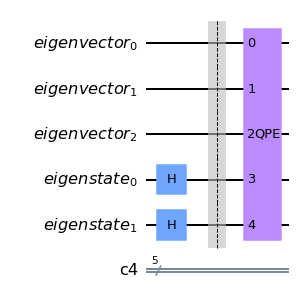

In [30]:
# Initalize the circuit to |++>

ev = QuantumRegister(3, 'eigenvector')
es = QuantumRegister(2, 'eigenstate')
c = ClassicalRegister(5)
qc = QuantumCircuit(ev,es,c)

initialize(qc)

# Set up unitary 
unitaryToTest = unitary()

# append the phaseEstimation 
qc.append(PhaseEstimation(num_evaluation_qubits=3, unitary=unitaryToTest), ev[:]+es[:])

# Draw the circuit to be used
qc.draw('mpl')


We can again prove that the eigenstate |++> works because the output of the eigenstate should still be |++> after the phase estimation circuit is applied. Therefore, we can prove this by applying the initialization in reverse order.

Then, using the function "output eigenvector" from above, we can figure out the eigenvector using the equation previously explained

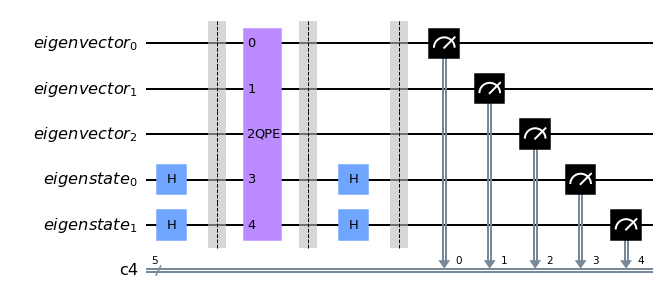

In [31]:
# Reverse the initialization
qc.barrier()
initialize(qc)

for i in range(5):
    qc.measure(i,i)
sim = Aer.get_backend('qasm_simulator')
counts = execute(qc, sim).result().get_counts()
qc.draw('mpl')

In [32]:
# Expected outcome: ??? for eigenvector, 00 for eigenstate (Read above for explanation)
# Together : 00???
print("Expected:")
print("Eigenstate is correct\n")

print("Actual:")
checkEigenstate("00", counts.most_frequent())

Expected:
Eigenstate is correct

Actual:
Eigenstate is correct


In [33]:
# Now, we can figure out what the eigen vector is:
outputEigenvector(counts.most_frequent(), 3)

print("\n\n" + "(Raw Output for whole thing:\t\t" + str(counts) + ")")

Eigenvector is: 1.75*𝜋


(Raw Output for whole thing:		{'00111': 1024})


#### Exercise 4.3

Use *Phase Estimation* to show that $|+\rangle$ is **not** an eigenstate of the [T gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TGate.html).

In [37]:
# Sets the initial state to |+>

def initialize(qc):
    qc.h(3)
    qc.barrier()

In [38]:
# Return circuit used for the unitary of Rxx(𝜋/2)
def unitary():
    unitary = QuantumRegister(1, 'unitary')
    unitaryToTest = QuantumCircuit(unitary)
    unitaryToTest.t(0)
    return unitaryToTest

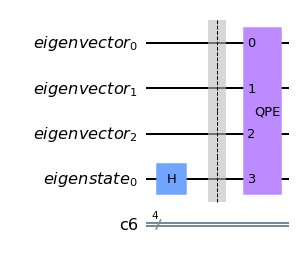

In [39]:
# Initalize the circuit to |++>

ev = QuantumRegister(3, 'eigenvector')
es = QuantumRegister(1, 'eigenstate')
c = ClassicalRegister(4)
qc = QuantumCircuit(ev,es,c)

initialize(qc)

# Set up unitary 
unitaryToTest = unitary()

# append the phaseEstimation 
qc.append(PhaseEstimation(num_evaluation_qubits=3, unitary=unitaryToTest), ev[:]+es[:])

# Draw the circuit to be used
qc.draw('mpl')


We can prove that the eigenstate |+> doesn't work but the output of  the eigenstate after the phase estimation circuit is applied will no longer be |+>. Therefore, reversing it will not result in the state being |0>

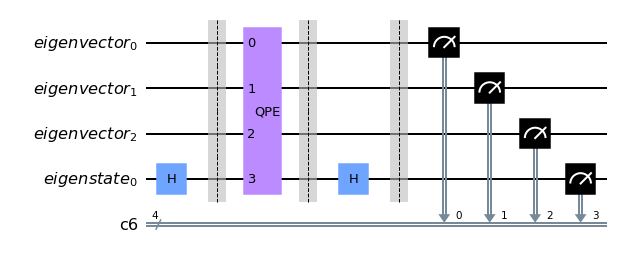

In [40]:
# Reverse the initialization
qc.barrier()
initialize(qc)

for i in range(4):
    qc.measure(i,i)
sim = Aer.get_backend('qasm_simulator')
counts = execute(qc, sim).result().get_counts()
qc.draw('mpl')

In [41]:
# Expected outcome: ??? for eigenvector, 0 for eigenstate (Read above for explanation)
# Together : ????
print("Expected:")
print("Eigenstate is not correct\n")

print("Actual:")

checkEigenstate("0", counts.most_frequent())

print("\n\n" + "Raw Output:\t\t" + str(counts))

Expected:
Eigenstate is not correct

Actual:
Eigenstate is not correct


Raw Output:		{'0000': 250, '0100': 264, '1000': 255, '1100': 255}


#### Exercise 4.4

Use *Quantum Counting* to figure out the number of values $x$ such that $x$ is a multiple of $4$, and $25 < x < 50$. 

Yes, you can easily do this classically. But we're learning about quantum algorithms, so we're going to do it this way.

*Hint:* The number of qubits needed for the Grover operator will be larger than the size of $x$ because of ancilla qubits in the oracle. However, when computing your answer, do not count the ancilla qubits. In other words, in the sample notebook for Quantum Counting, the calculation of N (in cell 11) should be based on the number of qubits $x$, not the total number of input qubits to the oracle circuit.

*Hint:* You will need a fair number of qubits (e.g. 6) in the phase estimation part to get a reasonably accurate answer. On my laptop, using 6 qubits, it takes about 30 secs to build the circuit and about 50 seconds to simulate. These times will likely double (at least) for each additional qubit you add.

**NOTE:** For much of this exercise, I followed the code provided in class from the "quantum_counting" notebook. 

First, we much define the oracle that marks all of the answers. I did this in three parts - First, with the answers between 32 and 44; Second, with the answer 28; Third, with the answer 48

In [22]:
# Defines the oracle to be used
# Barr defines if barriers should be inserted into the circuit (used for drawing how it looks)
def oracle(barr=False):
#     Target is the register to be used
    target = QuantumRegister(6, "target")
#     K is just used to apply the z gate if the condition is correct
    k = AncillaRegister(1, 'k')
    qc = QuantumCircuit(target, k)
    
#     Marks if answer is between 32 and 44 and a multiple of four
    qc.x(0)
    qc.x(1)
    qc.x(4)
    qc.append(XGate().control(4),[target[0],target[1],target[4],target[5],k[0]])
    qc.x(0)
    qc.x(1)
    qc.x(4)
    
    qc.z(k[0])
    
    qc.x(0)
    qc.x(1)
    qc.x(4)
    qc.append(XGate().control(4),[target[0],target[1],target[4],target[5],k[0]])
    qc.x(0)
    qc.x(1)
    qc.x(4)    
    
    
#     Deals with if the answer is 28
    if barr: qc.barrier()
    qc.x(0)
    qc.x(1)
    qc.x(5)
    qc.append(XGate().control(6),[target[0],target[1],target[2],target[3],target[4],target[5],k[0]])
    qc.x(0)
    qc.x(1)
    qc.x(5)
    
    qc.z(k[0])
    
    qc.x(0)
    qc.x(1)
    qc.x(5)
    qc.append(XGate().control(6),[target[0],target[1],target[2],target[3],target[4],target[5],k[0]])
    qc.x(0)
    qc.x(1)
    qc.x(5)
        
    
#     Deals with if answer is 48
    if barr: qc.barrier()
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.append(XGate().control(6),[target[0],target[1],target[2],target[3],target[4],target[5],k[0]])
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    
    qc.z(k[0])
    
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.append(XGate().control(6),[target[0],target[1],target[2],target[3],target[4],target[5],k[0]])
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    
    if barr: qc.barrier()
        
    return qc

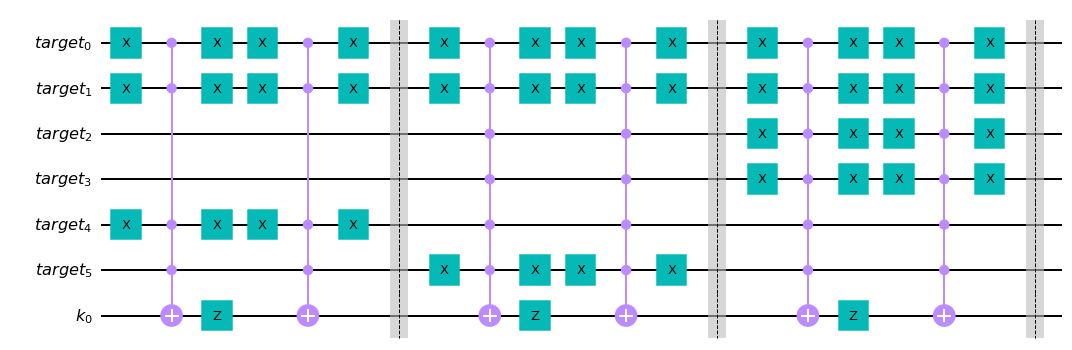

In [23]:
# Draws the oracle 
oracle(True).draw('mpl')

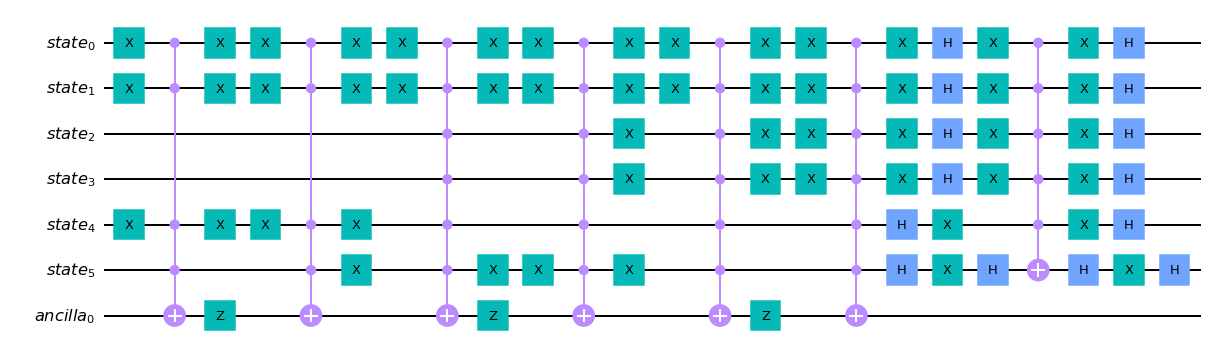

In [24]:
# Draws the grover operator that uses the oracle
grit = GroverOperator(oracle())
grit.draw('mpl')

Now, we can prepare the QFT and use it

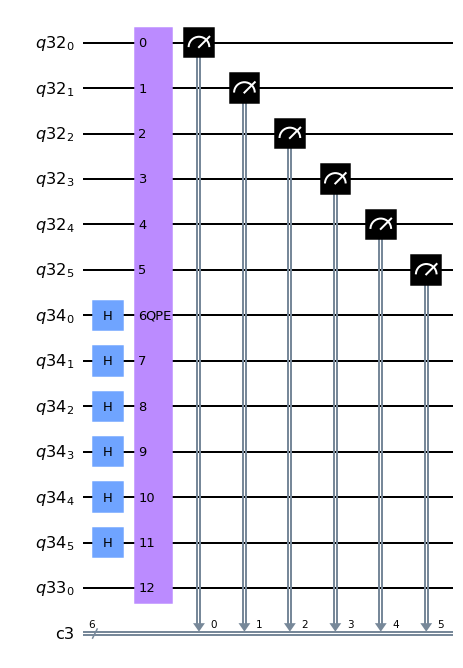

In [25]:
# Prepares registers
resolution = 6
inputSize = 6
m = QuantumRegister(resolution)
x = QuantumRegister(1)
n = QuantumRegister(inputSize)
ph = ClassicalRegister(resolution)   # fractional representation of phase
qc = QuantumCircuit(m, n, x, ph)

# Applies h gates to see the 'proper' answers
qc.h(n)

# Uses the QFT to get the answers
iq = QFT(resolution, inverse = True, name="invQFT").reverse_bits()
qc.append(PhaseEstimation(resolution, grit, iq), m[:]+n[:]+x[:])
qc.measure(m, ph)

# Draws the circuit
qc.draw('mpl')

{'000000': 1, '010000': 2, '010001': 1, '010010': 1, '010101': 2, '010110': 2, '010111': 6, '011000': 11, '011001': 93, '011010': 356, '011011': 26, '011100': 8, '011101': 2, '011110': 2, '011111': 2, '100000': 4, '100001': 2, '100010': 1, '100100': 10, '100101': 20, '100110': 346, '100111': 86, '101000': 17, '101001': 2, '101010': 3, '101011': 3, '101100': 2, '101101': 2, '101110': 1, '110111': 1, '001001': 2, '001010': 1, '001011': 1, '001101': 1, '001110': 2, '001111': 2}


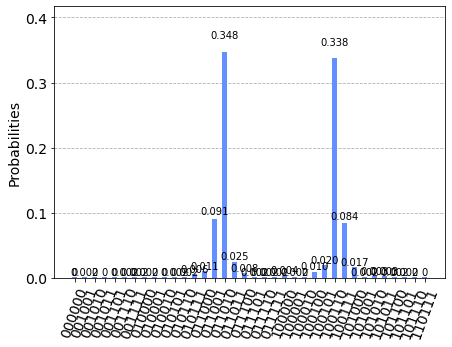

In [26]:
# Executes the circuit and prints the histogram

qsim = Aer.get_backend('qasm_simulator')
job = execute(qc, qsim)  # default number of shots is 1024, but you can specify
result = job.result()
hist = result.get_counts()
print(hist)
plot_histogram(hist)

Now that we have the output for the circuit, we can apply some post processing to figure out the numbers of solutions

In [35]:
# Converts the bit into an int
measured_str = max(hist, key=hist.get)
# print(measured_str)
measured_int = int(measured_str,2)
# print("Register Output = %i" % measured_int)

# Figure out theta, in radians:
theta = (measured_int/(2**resolution))*np.pi*2
# print("Theta = %.5f" % theta)

# Using theta, we can output the Number of solutions and figure out the error
N = 2**inputSize
M = N * (np.sin(theta/2)**2)

m = resolution - 1 # Upper bound: Will be less than this 
err = (np.sqrt(2*M*N) + N/(2**(m-1)))*(2**(-m))

print("Expected Answer:")
print("No. of Solutions = %.1f" % 6)

print("\nActual Answer:")
print("No. of Solutions = %.1f +- " % (M), end="")
print("%.2f" % err)

Expected Answer:
No. of Solutions = 6.0

Actual Answer:
No. of Solutions = 5.4 +- 2.83
